# Projeto 3 - Análise de sentimento sobre o mercado financeiro

## Financial Sentiment Analysis
Este conjunto de dados reúne diversos textos sobre o mercado financeiro e categoriza cada texto em positivo, negativo e neutro.

## Sobre este projeto
Os principais pontos que serão avaliados:
*   Extração de dados
*   Manipulação de dados e criação de gráficos simples com o Pandas
*   Criar um modelo de predição
*   Apresentação dos resultados

## Preparação do ambiente
*   Para este projeto, acessem o link do dataset e logo abaixo cliquem em "Download". Caso você não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
*   Este conjunto de dados está em inglês, use o Spacy e os demais dados auxiliares em inglês.
*   Caso demore demais para executar ou que ocorra estouro de memória, use somente 40% dos dados.

In [ ]:
# ATENÇÃO: 
# Atualização da biblioteca utilizada e download do pacote de linguagem.
# Pode ser necessário reiniciar o ambiente de execução para que o comando "spacy.load('en_core_web_trf')" seja devidamente executado.

# Utilizar a GPU ajuda a diminuir o tempo de execução.

!pip install spacy==3.3.1
!python -m spacy download en_core_web_trf

import warnings
warnings.filterwarnings("ignore")
# Os principais warnings são sobre a ausência de GPU no processamento dos dados, então são desnecessários.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 53.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import resample

df = pd.read_csv('/content/data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
print(spacy.__version__)

# Deve ser 3.3.1

3.3.1


# Exercício
Construa as funções e a pipeline, separe os dados em treino e teste, execute a pipeline para classificar em positivo, negativo e neutro. Quais foram os valores de acurácia, precisão e sensitividade deste modelo? (3.0 pontos)

In [ ]:
nlp = spacy.load('en_core_web_md')

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# remoção de espaços e caracteres especiais
def clean_text(texto):
    texto_limpo = texto.strip().lower()  
    texto_limpo = ''.join(e for e in texto_limpo if (e.isalnum() or e.isspace()))
    return texto_limpo

# Esta funcao remove todas as stopwords e pontuacoes
def tokenizer(texto):
    doc = nlp(texto)
    tokens = [token for token in doc if ((not token.is_stop) & (not token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    return tokens

# Vetorização de textos'
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1))

# Modelo de classificação
classifier = MultinomialNB()

In [ ]:
# Separando em X e y
X = df['Sentence']
y = df['Sentiment']

# Separando em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Construindo uma pipeline
pipe = Pipeline([('cleaner', predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


print(round(accuracy_score(y_test, y_pred), 3))
print(round(precision_score(y_test, y_pred, average='macro'), 3))
print(round(recall_score(y_test, y_pred, average='macro'), 3))
pd.DataFrame(classification_report(y_pred, y_test,output_dict=True)).T # Exibição das métricas acima de para cada valor de classificação

0.672
0.589
0.565


,precision,recall,f1-score,support
negative,0.248555,0.355372,0.292517,121.00000
neutral,0.807571,0.714086,0.757957,717.00000
positive,0.638122,0.697885,0.666667,331.00000
accuracy,0.672370,0.672370,0.672370,0.67237
macro avg,0.564749,0.589115,0.572380,1169.00000
weighted avg,0.701729,0.672370,0.683932,1169.00000


As métricas avaliadas foram:  
Acurácia = 0.672  
Precisão = 0.589  
Recall = 0.565   

As métricas não são boas, porém, são melhores que uma escolha aleatória. Observando o classification_report notamos que o maior problema está na classificação das observações negativas.

# Exercício
Use o seu modelo para classificar os seguintes textos extraídos do site Financial Times. Faça uma tabela com o valor esperado e o valor obtido, e responda: houve divergência entre o esperado e o obtido? O que poderia ser feito para corrigir? (1.0 ponto)  
a. Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety. resultado esperado: [negativo]   
b. China opens up bond market in bid to woo foreign investors. resultado esperado: [neutro]  
c. HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this. resultado esperado: [negativo]  
d. Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism. resultado esperado: [negativo]  
e. Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate. resultado esperado: [neutro]

In [ ]:
ex2 = pd.Series(['Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety.',
          'China opens up bond market in bid to woo foreign investors.',
          'HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this.',
          'Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism.',
          'Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate.'])

y_pred = pipe.predict(ex2)
y_pred

array(['positive', 'neutral', 'neutral', 'neutral', 'neutral'],
      dtype='<U8')

O modelo errou todas as classificações, porém podemos notar um padrão. Apesar das entradas serem majoritariamente negativas e neutras, nosso modelo tende a avaliá-las como neutras ou positivas. Isso acontece porque a base de dados está desbalanceada.  
Esse problema era esperado já que o classification report mostra que o modelo possui um desempenho ruim ao avaliar frases negativas.

In [ ]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

Além disso, há frases duplicadas.



In [ ]:
df.drop_duplicates(subset='Sentence')['Sentiment'].value_counts()

neutral     2878
positive    1852
negative     592
Name: Sentiment, dtype: int64

Como não é possível saber a avaliação correta de cada frase a não ser por sua análise individual, a primeira ocorrência será mantida e as demais descartadas.

In [ ]:
df = df.drop_duplicates(subset='Sentence').reset_index().drop('index', axis = 1)
df.shape

(5322, 2)

Os dados de treino e teste serão ajustados com uma amostragem de 592 observações das observações positivas e neutras.

In [ ]:
df_negative = df[df['Sentiment'] == 'negative']
df_neutral = df[df['Sentiment'] == 'neutral']
df_positive = df[df['Sentiment'] == 'positive']

df_balanceado = pd.concat([df_negative, resample(df_neutral, n_samples= 592, random_state=37, replace=True), resample(df_positive, n_samples= 592, random_state=37, replace=True)])

In [ ]:
df_balanceado = df_balanceado.sample(frac=1, random_state=37) # Embaralha o dataframe para não ocorrer problemas na divisão entre treino e testes
df_balanceado

,Sentence,Sentiment
3671,`` The industry is coming to an interesting fo...,neutral
3358,The combined value of the orders is EUR 45mn .,neutral
2301,M+ñkel+ñ is demanding a new Board for the comp...,neutral
176,CEO Erkki J+ñrvinen is happy with the company ...,positive
4033,"The company reported a profit of 800,000 euro ...",neutral
...,...,...
3727,"Thanks to the internet , consumers compare pro...",negative
1817,"Founded in 1946 , Strand Associates , which pr...",neutral
1944,The airline estimated that the cancellation of...,negative
533,Changes being announced today will be effectiv...,neutral


In [ ]:
# Novos X e y
X = df_balanceado['Sentence']
y = df_balanceado['Sentiment']

# Separando em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(round(accuracy_score(y_test, y_pred), 3))
print(round(precision_score(y_test, y_pred, average='macro'), 3))
print(round(recall_score(y_test, y_pred, average='macro'), 3))
pd.DataFrame(classification_report(y_pred, y_test,output_dict=True)).T

0.666
0.665
0.67


,precision,recall,f1-score,support
negative,0.690909,0.633333,0.660870,120.00000
neutral,0.752137,0.698413,0.724280,126.00000
positive,0.565891,0.663636,0.610879,110.00000
accuracy,0.665730,0.665730,0.665730,0.66573
macro avg,0.669646,0.665127,0.665343,356.00000
weighted avg,0.673951,0.665730,0.667866,356.00000


As novas métricas são:  
Acurácia = 0.666  
Precisão = 0.665  
Recall = 0.67  

As métricas são melhores que as anteriores e, ao analisar o classification_report, notamos que a performance nas classificações negativas aumenta de forma significativa indicando a maior capacidade de generalização deste novo modelo.

In [ ]:
y_pred = pipe.predict(ex2)
y_pred

array(['positive', 'neutral', 'neutral', 'neutral', 'negative'],
      dtype='<U8')

# Exercício
Faça uma análise exploratória, onde identifique as três empresas mais citadas e quantifique os níveis de positividade, negatividade e neutralidade dos textos sobre estas empresas. (3.0 pontos)  

a. Extraia de todos os textos as entidades, há quantas entidades? (0.6 pontos)   


Será utilizado o dataframe sem sentenças repetidas.

In [ ]:
sentencias = df['Sentence'].apply(clean_text).apply(nlp) # Limpa o texto e aplica o NLP a cada uma das sentenças estudadas
entidades = sentencias.apply(lambda x: x.ents) # Separa apenas as entidades presentes dentro de cada sentença
entidades

0                                    ((benefon, s, gps),)
1                                                ((150),)
2       ((the, last, quarter, of, 2010), (componenta),...
3       ((the, finnishrussian, chamber, of, commerce),...
4       ((swedish), (224, percent), (almost, eighteen,...
                              ...                        
5317                             ((hsbc), (585, million))
5318                            ((daily, mail), (yahoos))
5319                                                   ()
5320                               ((viking, line), (eu))
5321    ((helsinki, afx,  ), (four), (indian), (bhusha...
Name: Sentence, Length: 5322, dtype: object

In [ ]:
def ents_to_list(entidade): # Função que recebe uma tupla de entidades e transforma em uma lista de strings com o texto da própria entidade.
  resultado = []
  for i in entidade:
    resultado.append(i.text)
  
  return resultado

In [ ]:
entidades_lista = entidades.apply(ents_to_list)

entidades_lista2 = []
for i in entidades_lista: # Percorre a série de listas de entidades e transforma em uma lista única.
  for j in i:
    entidades_lista2.append(j)

print(f'A quantidade de entidades detectadas é de: {len(entidades_lista2)}') # Conta o número de entidades na lista.
print(f'A quantidade de entidades SEM repetições é de: {len(list(set(entidades_lista2)))}') # Conta o número de entidades ÚNICAS na lista.

A quantidade de entidades detectadas é de: 12429
A quantidade de entidades SEM repetições é de: 6820


b. Quantas entidades são empresas? (0.6 pontos)  


In [ ]:
# Função que recebe uma tupla de entidades e transforma em uma lista de strings com o texto da própria entidade caso essa entidade tenha a label == 'ORG'.

def id_org(entidades):
  resultado = []
  for i in entidades:
    if i.label_ == 'ORG':
      resultado.append(i.text)
    
  return resultado

In [ ]:
entidades2 = entidades.apply(id_org)

ent_orgs_list = []
for i in entidades2:
  for j in i:
    ent_orgs_list.append(j)

print(f'A quantidade de entidades com "label" == "ORG" é de: {len(ent_orgs_list)}')
print(f'A quantidade de entidades com "label" == "ORG" SEM repetições é de: {len(list(set(ent_orgs_list)))}')

A quantidade de entidades com "label" == "ORG" é de: 3767
A quantidade de entidades com "label" == "ORG" SEM repetições é de: 2257


c. Quais são as três empresas mais citadas? (0.6 pontos)  


In [ ]:
entidades2 = entidades2.apply(dict.fromkeys).apply(list) # Remove valores duplicados dentro de uma MESMA mensagem. (uma citação é o suficiente para aquela mensagem tratar de tal empresa)

orgs = []
for i in entidades2:
  for j in i:
    orgs.append(j)

orgs_unicas, contagem = np.unique(orgs, return_counts=True)

In [ ]:
pd.DataFrame([orgs_unicas,contagem], index=['Orgs','Contagem']).T.sort_values('Contagem',ascending=False).head(3)

,Orgs,Contagem
1269,nokia,59
180,astrazeneca,24
1909,tesco,22


d. Faça uma tabela onde demonstre as três empresas mais citadas e o total de textos positivos, negativos e neutros de cada uma. (1.2 pontos)

In [ ]:
orgs = []
sent = []
for i in range(len(entidades2)):
  for j in entidades2[i]:
    orgs.append(j)
    sent.append(df['Sentiment'][i])

In [ ]:
df_orgs = pd.DataFrame([orgs,sent], index=['Orgs','Sentiment']).T # Dataframe de orgs e os sentimentos
df_orgs = df_orgs.groupby(['Orgs','Sentiment']).size().unstack(fill_value=0)
df_orgs = df_orgs.reset_index()
df_orgs['citações'] = df_orgs['negative'] + df_orgs['neutral'] + df_orgs['positive']

df_orgs = df_orgs.sort_values('citações', ascending = False).head(3)
df_orgs

Sentiment,Orgs,negative,neutral,positive,citações
1269,nokia,2,34,23,59
180,astrazeneca,5,1,18,24
1909,tesco,7,2,13,22


# Exercício
Faça gráficos a partir da tabela obtida acima. Descreva cada gráfico de forma que estivesse apresentando à diretoria dessas três empresas. (3.0 pontos)

In [ ]:
df_graficos = pd.concat([df_orgs,pd.DataFrame(df_orgs.drop('Orgs', axis = 1).sum(), columns=['Soma']).T])
df_graficos['neg_rel'] = df_graficos['negative']/df_graficos['citações']
df_graficos['neu_rel'] = df_graficos['neutral']/df_graficos['citações']
df_graficos['pos_rel'] = df_graficos['positive']/df_graficos['citações']

df_graficos

Sentiment,Orgs,negative,neutral,positive,citações,neg_rel,neu_rel,pos_rel
1269,nokia,2,34,23,59,0.033898,0.576271,0.389831
180,astrazeneca,5,1,18,24,0.208333,0.041667,0.750000
1909,tesco,7,2,13,22,0.318182,0.090909,0.590909
Soma,NaN,14,37,54,105,0.133333,0.352381,0.514286


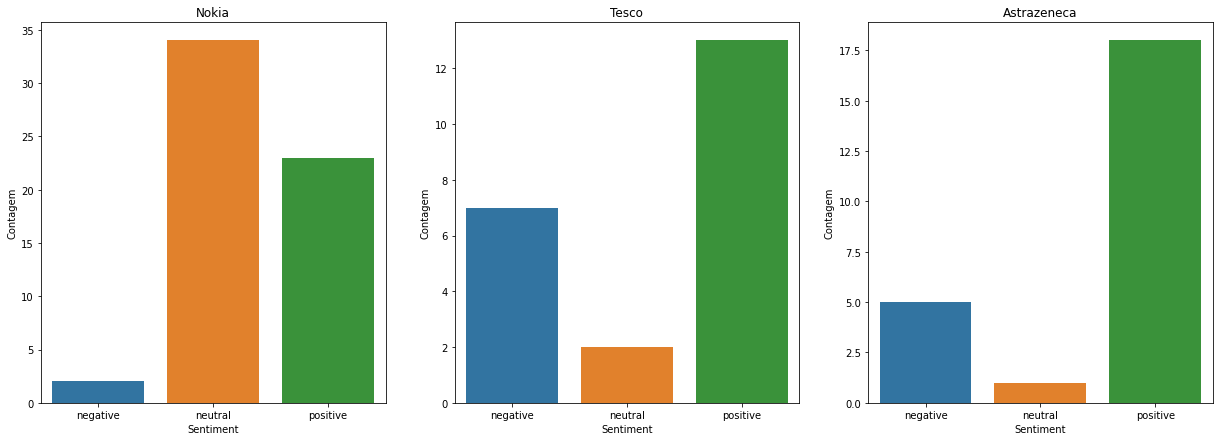

In [ ]:
plt.subplots(1,3, figsize=(7*3,7))

plt.subplot(1,3,1)
sns.barplot(data = df_orgs[df_orgs['Orgs'] == 'nokia'].drop('citações', axis = 1))
plt.title('Nokia')
plt.ylabel('Contagem')

plt.subplot(1,3,2)
sns.barplot(data = df_orgs[df_orgs['Orgs'] == 'tesco'].drop('citações', axis = 1))
plt.title('Tesco')
plt.ylabel('Contagem')

plt.subplot(1,3,3)
sns.barplot(data = df_orgs[df_orgs['Orgs'] == 'astrazeneca'].drop('citações', axis = 1))
plt.title('Astrazeneca')
plt.ylabel('Contagem')

plt.show()

Este conjunto de gráficos mostra o total de avaliações de uma empresa e as proporções entre avaliações positivas, negativas e neutras. Este gráfico é útil para mostrar a percepção do mercado sobre a própria empresa. A Astrazeneca, por exemplo, sabe que a maior parte de suas avaliações são positivas e que não precisa de maiores alterações em sua gestão. A Nokia, por outro lado, possui um grande numero de avaliações neutras, isso pode ser um sinal de alerta para a gestão da empresa.

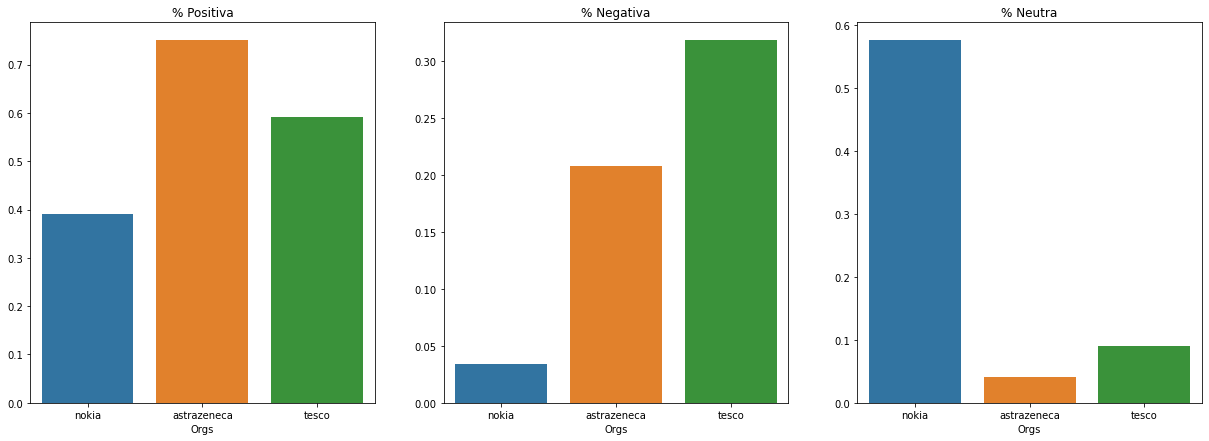

In [ ]:
plt.subplots(1,3, figsize=(7*3,7))

plt.subplot(1,3,2)
sns.barplot(data = df_graficos, y = 'neg_rel', x = 'Orgs')
plt.title('% Negativa')
plt.ylabel('')

plt.subplot(1,3,3)
sns.barplot(data = df_graficos, y = 'neu_rel', x = 'Orgs')
plt.title('% Neutra')
plt.ylabel('')

plt.subplot(1,3,1)
sns.barplot(data = df_graficos, y = 'pos_rel', x = 'Orgs')
plt.title('% Positiva')
plt.ylabel('')

plt.show()

O segundo conjunto de gráficos foi feito para a comparação entre as empresas. Neste conjunto é possível analisar a porcentagem de avaliações positivas, negativas e neutras entre as empresas e compará-las. Assim, podemos ver que a Astrazeneca possui uma proporção de avaliações positivas acima da média em relação a outras empresas. A Tesco possui uma proporção de avaliações negativas acima da média, essa informação não era tão evidente nos gráficos anteriores. E a Nokia possui um perfil de avaliações neutras atípico, é muito maior que o das outras empresas. 